In [5]:
import numpy as np
import keras

from keras.applications import mobilenetv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
classes = !ls data/train

In [8]:
num_classes = len(classes)

In [9]:
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, GlobalAveragePooling2D

In [10]:
mobile_base = mobilenetv2.MobileNetV2(weights='imagenet', include_top=False)
x = mobile_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=mobile_base.input, outputs=outputs)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/keras_applications/mobilenet_v2.py:315: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [7]:
from keras.optimizers import Adam

In [8]:
model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=0.0001),
                metrics=['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_generator = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_generator = ImageDataGenerator(rescale=1. / 255)

In [11]:
train_dataset = train_generator.flow_from_directory(
                "data/train",
                target_size = (224, 224),
                batch_size = 32,
                class_mode = 'categorical')

Found 37836 images belonging to 75 classes.


In [12]:
val_dataset = train_generator.flow_from_directory(
              "data/test",
              target_size = (224, 224),
              class_mode = 'categorical')

Found 12709 images belonging to 75 classes.


In [13]:
model.fit_generator(train_dataset,
                    steps_per_epoch = 37836 // 32,
                    epochs = 3,
                    validation_data = val_dataset,
                    validation_steps = 1)

Epoch 1/3
1182/1182 [==============================] - 742s 627ms/step - loss: 0.2630 - acc: 0.9463 - val_loss: 0.1474 - val_acc: 0.9375
Epoch 2/3
1182/1182 [==============================] - 767s 649ms/step - loss: 0.0184 - acc: 0.9929 - val_loss: 0.1006 - val_acc: 0.9375
Epoch 3/3
1182/1182 [==============================] - 766s 648ms/step - loss: 0.0206 - acc: 0.9917 - val_loss: 0.3602 - val_acc: 0.9375


In [14]:
from keras.models import model_from_json

In [48]:
model_json = model.to_json()
with open("models/fruit-temp-v1.json", "w") as json_file:
    json_file.write(model_json)

In [49]:
model.save_weights("models/fruit-temp-v1.h5")

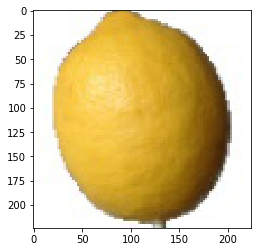

In [37]:
img = img_to_array(load_img('data/train/Lemon/101_100.jpg', target_size=(224, 224)))
plt.imshow(np.uint8(img))
plt.show()

In [38]:
img_b = np.expand_dims(img, axis=0)
img_p = img_b.copy()/255

In [39]:
predictions = model.predict(img_p)

In [40]:
classes[np.argmax(predictions)]

'Lemon'

In [42]:
classes[:3]

['Apple Braeburn', 'Apple Golden 1', 'Apple Golden 2']

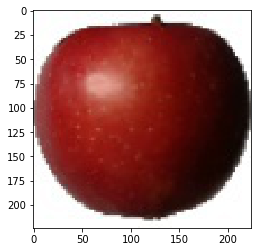

In [43]:
img = img_to_array(load_img('data/train/Apple Braeburn/101_100.jpg', target_size=(224, 224)))
plt.imshow(np.uint8(img))
plt.show()

In [44]:
img_b = np.expand_dims(img, axis=0)
img_p = img_b.copy()/255

In [45]:
predictions = model.predict(img_p)

In [47]:
classes[np.argmax(predictions)]

'Apple Braeburn'

In [50]:
from keras import backend as K

In [12]:
import tensorflow as tf

In [52]:
saver = tf.train.Saver()

In [54]:
saver.save(K.get_session(), 'models/fruit-temp-v1.ckpt')

'models/fruit-temp-v1.ckpt'

In [13]:
[print(n.name) for n in tf.get_default_graph().as_graph_def().node]

input_1
Conv1/random_uniform/shape
Conv1/random_uniform/min
Conv1/random_uniform/max
Conv1/random_uniform/RandomUniform
Conv1/random_uniform/sub
Conv1/random_uniform/mul
Conv1/random_uniform
Conv1/kernel
Conv1/kernel/Assign
Conv1/kernel/read
Conv1/convolution/dilation_rate
Conv1/convolution
bn_Conv1/Const
bn_Conv1/gamma
bn_Conv1/gamma/Assign
bn_Conv1/gamma/read
bn_Conv1/Const_1
bn_Conv1/beta
bn_Conv1/beta/Assign
bn_Conv1/beta/read
bn_Conv1/Const_2
bn_Conv1/moving_mean
bn_Conv1/moving_mean/Assign
bn_Conv1/moving_mean/read
bn_Conv1/Const_3
bn_Conv1/moving_variance
bn_Conv1/moving_variance/Assign
bn_Conv1/moving_variance/read
bn_Conv1/IsVariableInitialized
bn_Conv1/IsVariableInitialized_1
bn_Conv1/IsVariableInitialized_2
bn_Conv1/IsVariableInitialized_3
bn_Conv1/IsVariableInitialized_4
bn_Conv1/init
bn_Conv1/Const_4
bn_Conv1/Const_5
bn_Conv1/FusedBatchNorm
bn_Conv1/Shape
bn_Conv1/strided_slice/stack
bn_Conv1/strided_slice/stack_1
bn_Conv1/strided_slice/stack_2
bn_Conv1/strided_slice
bn_Co

block_6_project_BN/AssignMovingAvg
block_6_project_BN/AssignMovingAvg_1/decay
block_6_project_BN/AssignMovingAvg_1/block_6_project_BN/moving_variance/zeros
block_6_project_BN/moving_variance/biased
block_6_project_BN/moving_variance/biased/Assign
block_6_project_BN/moving_variance/biased/read
block_6_project_BN/moving_variance/local_step/Initializer/zeros
block_6_project_BN/moving_variance/local_step
block_6_project_BN/moving_variance/local_step/Assign
block_6_project_BN/moving_variance/local_step/read
block_6_project_BN/AssignMovingAvg_1/block_6_project_BN/moving_variance/sub
block_6_project_BN/AssignMovingAvg_1/block_6_project_BN/moving_variance/mul
block_6_project_BN/AssignMovingAvg_1/block_6_project_BN/moving_variance/block_6_project_BN/moving_variance
block_6_project_BN/AssignMovingAvg_1/block_6_project_BN/moving_variance/AssignAdd/value
block_6_project_BN/AssignMovingAvg_1/block_6_project_BN/moving_variance/AssignAdd
block_6_project_BN/AssignMovingAvg_1/block_6_project_BN/moving_

block_13_project_BN/moving_variance/read
block_13_project_BN/Const_4
block_13_project_BN/Const_5
block_13_project_BN/FusedBatchNorm
block_13_project_BN/Shape
block_13_project_BN/strided_slice/stack
block_13_project_BN/strided_slice/stack_1
block_13_project_BN/strided_slice/stack_2
block_13_project_BN/strided_slice
block_13_project_BN/Shape_1
block_13_project_BN/strided_slice_1/stack
block_13_project_BN/strided_slice_1/stack_1
block_13_project_BN/strided_slice_1/stack_2
block_13_project_BN/strided_slice_1
block_13_project_BN/Shape_2
block_13_project_BN/strided_slice_2/stack
block_13_project_BN/strided_slice_2/stack_1
block_13_project_BN/strided_slice_2/stack_2
block_13_project_BN/strided_slice_2
block_13_project_BN/Rank/packed
block_13_project_BN/Rank
block_13_project_BN/range/start
block_13_project_BN/range/delta
block_13_project_BN/range
block_13_project_BN/Prod/input
block_13_project_BN/Prod
block_13_project_BN/Cast
block_13_project_BN/sub/y
block_13_project_BN/sub
block_13_project_B

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,